In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas
import matplotlib.pyplot as plt

Loading the goejson file which contains the map of Indian Parliamentary Constituencies

In [2]:
map_total = geopandas.read_file('india_pc_2019_simplified.geojson') 

In [3]:
map_total.head()

,pc_id,st_code,st_name,pc_no,pc_name,pc_name_hi,pc_category,wikidata_qid,status,2019_election_phase,2019_election_date,geometry
0,201,2,Himachal Pradesh,1,Kangra,कांगड़ा,GEN,Q6362861,None,7,2019-05-19,"MULTIPOLYGON (((76.57700 33.20600, 76.59800 33..."
1,202,2,Himachal Pradesh,2,Mandi,मंडी,GEN,Q6748042,None,7,2019-05-19,"MULTIPOLYGON (((76.79500 33.25600, 76.82000 33..."
2,203,2,Himachal Pradesh,3,Hamirpur,हमीरपुर,GEN,Q5645333,None,7,2019-05-19,"MULTIPOLYGON (((76.02000 32.14000, 76.04300 32..."
3,204,2,Himachal Pradesh,4,Shimla,शिमला,SC,Q7496887,None,7,2019-05-19,"MULTIPOLYGON (((78.09400 31.41900, 78.16200 31..."
4,301,3,Punjab,1,Gurdaspur,गुरदासपुर,GEN,Q5619909,None,7,2019-05-19,"MULTIPOLYGON (((75.84300 32.50300, 75.90200 32..."


In the above map the shape of the constituencies is contained in the geometry field as a multipolygon

Not all the fields are need, so selecting only the relevant fields of the State, Constituency Name, Constituency No and its Geometry

In [4]:
map = map_total[['st_name', 'pc_no', 'pc_name', 'geometry']]

In [5]:
r19 = pd.read_excel('2019 results.xlsx')

In [6]:
r19.head()

,State,No,PC Name,Cat,Name,Party,Vote,Runner,Party 2,Vote 1,diff
0,Andaman and Nicobar Islands,1,Andaman & Nicobar Islands,GEN,Kuldeep Rai Sharma,Indian National Congress,95308,Vishal Jolly,Bharatiya Janata Party,93901,1407
1,Andhra Pradesh,1,Araku,(ST),Goddeti Madhavi,YSR Congress Party,"5,62,190",Kishore Chandra Deo,Telugu Desam Party,"3,38,101","2,24,089"
2,NaN,2,Srikakulam,GEN,Ram Mohan Naidu Kinjarapu,Telugu Desam Party,"5,34,544",Duvvada Srinivas,YSR Congress Party,"5,27,891",6653
3,NaN,3,Vizianagaram,GEN,Bellani Chandrasekhar,YSR Congress Party,"5,78,418",Pusapati Ashok Gajapathi Raju,Telugu Desam Party,"5,30,382",48036
4,NaN,4,Visakhapatnam,GEN,MVV Satyanarayana,YSR Congress Party,"4,36,906",Bharat Muthukumilli,Telugu Desam Party,"4,32,492",4414


Some of the state names are missing, filling it with the correct names. The ffill option fill all the rows having Nan with the value from above the Nan rows

In [ ]:
r19 = r19.fillna(method='ffill')

Selecting only the relevant fields

In [8]:
r19 = r19[['State', 'No', 'PC Name', 'Cat', 'Name', 'Party']]

Renaming the fields 

In [9]:
r19.columns = ['State', 'PC No.', 'PC Name', 'Category', 'Winner', 'Party']

In [10]:
r19 = r19.astype(str)

In [11]:
r19['PC No.'] = r19['PC No.'].astype(int)

Adding a year column to the DataFrame

In [12]:
r19['Year'] = '2019'

Lets us see the seats won by each party

In [95]:
r19['Party'].value_counts()

Bharatiya Janata Party                      302
Indian National Congress                     52
Dravida Munnetra Kazhagam                    24
All India Trinamool Congress                 22
YSR Congress Party                           22
Shiv Sena                                    18
Janata Dal (United)                          17
Biju Janata Dal                              12
Bahujan Samaj Party                          10
Telangana Rashtra Samithi                     9
Lok Janshakti Party                           6
Samajwadi Party                               5
Nationalist Congress Party                    5
Independent                                   4
Telugu Desam Party                            3
Jammu & Kashmir National Conference           3
Communist Party of India (Marxist)            3
Indian Union Muslim League                    3
Communist Party of India                      2
All India Majlis-e-Ittehadul Muslimeen        2
Apna Dal (Sonelal)                      

BJP has the maximum seats. The names of the parties are in thier full forms. Converting the names to abbrevations

In [14]:
def test2(x):
    if x['Party'] == 'Bharatiya Janata Party':
        x['P'] = 'BJP'
    elif x['Party'] == 'Indian National Congress':
        x['P'] = 'INC'
    else:
        x['P'] = 'Other'
    return x

In [15]:
r19['P'] = 'a'

In [16]:
r19 = r19.apply(test2, axis=1)

The P column contains abbrevated party names. Here I am only considering Bhartiya Janta Party(BJP) and Indian National Congress(INC) to make a comparison among these both. All the other parties have been marked as other.

In [17]:
r19.head()

,State,PC No.,PC Name,Category,Winner,Party,Year,P
0,Andaman and Nicobar Islands,1,Andaman & Nicobar Islands,GEN,Kuldeep Rai Sharma,Indian National Congress,2019,INC
1,Andhra Pradesh,1,Araku,(ST),Goddeti Madhavi,YSR Congress Party,2019,Other
2,Andhra Pradesh,2,Srikakulam,GEN,Ram Mohan Naidu Kinjarapu,Telugu Desam Party,2019,Other
3,Andhra Pradesh,3,Vizianagaram,GEN,Bellani Chandrasekhar,YSR Congress Party,2019,Other
4,Andhra Pradesh,4,Visakhapatnam,GEN,MVV Satyanarayana,YSR Congress Party,2019,Other


In [18]:
r19['P'].value_counts()

BJP      302
Other    189
INC       52
Name: P, dtype: int64

To map the results to the map we need the State names and PC no columns. Lets have a look at the State names

In [19]:
r19.State.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [20]:
map.st_name.unique()

array(['Himachal Pradesh', 'Punjab', 'Uttarakhand', 'Haryana', 'Delhi',
       'Rajasthan', 'Uttar Pradesh', 'Bihar', 'Sikkim',
       'Arunachal Pradesh', 'Nagaland', 'Manipur', 'Mizoram', 'Tripura',
       'Meghalaya', 'Assam', 'West Bengal', 'Orissa', 'Chhattisgarh',
       'Madhya Pradesh', 'Gujarat', 'Maharashtra', 'Telangana',
       'Andhra Pradesh', 'Karnataka', 'Kerala', 'Goa', 'Tamil Nadu',
       'Puducherry', 'Chandigarh', 'Daman & Diu', 'Dadra & Nagar Haveli',
       'Andaman & Nicobar', 'Lakshadweep', 'Jammu & Kashmir', 'Jharkhand'],
      dtype=object)

Some of the State names are different in the results data and the map. So converting the state names in the results to match with state names in the map

In [21]:
def test3(x):
    if x['State'] == 'Andaman and Nicobar Islands':
        x['State'] = 'Andaman & Nicobar'
    elif x['State'] == 'Dadra and Nagar Haveli':
        x['State'] = 'Dadra & Nagar Haveli'
    elif x['State'] == 'Daman and Diu':
        x['State'] = 'Daman & Diu'
    elif x['State'] == 'Jammu and Kashmir':
        x['State'] = 'Jammu & Kashmir'
    elif x['State'] == 'Odisha':
        x['State'] = 'Orissa'
    else:
        None
    return x

In [22]:
r19 = r19.apply(test3, axis=1)

In [23]:
r19.State.unique()

array(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Orissa', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

Now all the state names match

In [24]:
r19.head()

,State,PC No.,PC Name,Category,Winner,Party,Year,P
0,Andaman & Nicobar,1,Andaman & Nicobar Islands,GEN,Kuldeep Rai Sharma,Indian National Congress,2019,INC
1,Andhra Pradesh,1,Araku,(ST),Goddeti Madhavi,YSR Congress Party,2019,Other
2,Andhra Pradesh,2,Srikakulam,GEN,Ram Mohan Naidu Kinjarapu,Telugu Desam Party,2019,Other
3,Andhra Pradesh,3,Vizianagaram,GEN,Bellani Chandrasekhar,YSR Congress Party,2019,Other
4,Andhra Pradesh,4,Visakhapatnam,GEN,MVV Satyanarayana,YSR Congress Party,2019,Other


In [25]:
map.head()

,st_name,pc_no,pc_name,geometry
0,Himachal Pradesh,1,Kangra,"MULTIPOLYGON (((76.57700 33.20600, 76.59800 33..."
1,Himachal Pradesh,2,Mandi,"MULTIPOLYGON (((76.79500 33.25600, 76.82000 33..."
2,Himachal Pradesh,3,Hamirpur,"MULTIPOLYGON (((76.02000 32.14000, 76.04300 32..."
3,Himachal Pradesh,4,Shimla,"MULTIPOLYGON (((78.09400 31.41900, 78.16200 31..."
4,Punjab,1,Gurdaspur,"MULTIPOLYGON (((75.84300 32.50300, 75.90200 32..."


Lets merge both the dataframe to plot a map

In [26]:
m = pd.merge(map[['st_name', 'pc_no', 'geometry']], r19[['State', 'PC No.', 'P']], how='left',
            left_on=['st_name', 'pc_no'], right_on=['State', 'PC No.'])

In [27]:
m.shape

(543, 6)

In [28]:
m.groupby(['P']).count()

,st_name,pc_no,geometry,State,PC No.
P,,,,,
BJP,302,302,302,302,302
INC,52,52,52,52,52
Other,189,189,189,189,189


Now lets the results of 2019 Indian Elections for BJP, INC and Others.

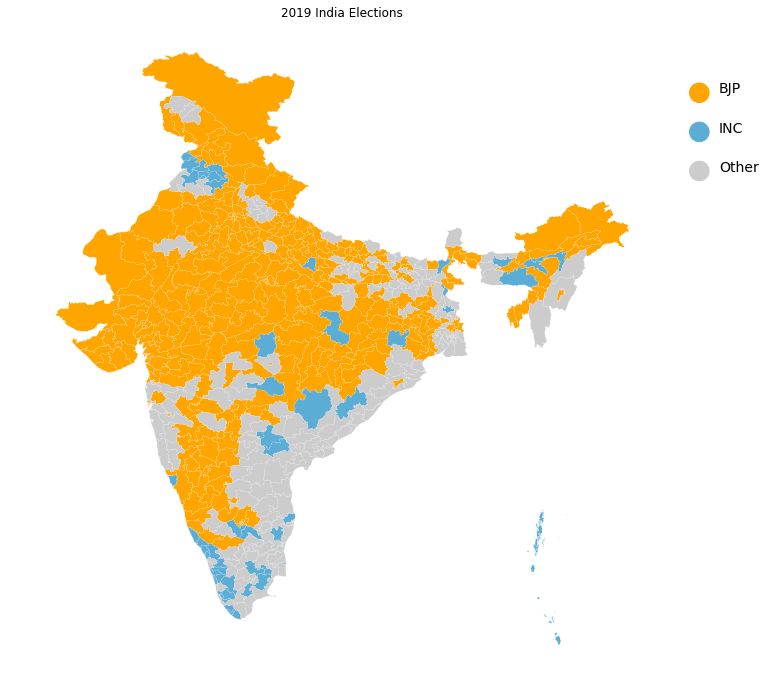

In [99]:
colorpallete = {'BJP': '#FFA500', 'INC': '#5BADD6', 'Other': '#CCCCCC'}
fig, ax = plt.subplots(figsize=(12, 12))
circle1 = plt.Circle((101, 35), 0.5, color='#FFA500', clip_on=False)
circle2 = plt.Circle((101, 33), 0.5, color='#5BADD6', clip_on=False)
circle3 = plt.Circle((101, 31), 0.5, color='#CCCCCC', clip_on=False)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.text(102, 35, 'BJP', fontsize=14)
ax.text(102, 33, 'INC', fontsize=14)
ax.text(102, 31, 'Other', fontsize=14)
for c, data in m.groupby(['P']):
    color = colorpallete[c]
    data.plot(color=color, ax=ax, label=str(c), legend=True, edgecolor='white', linewidth=0.1)

ax.set_axis_off()
plt.title('2019 India Elections')
plt.show()

We see most of the norther states and western and central states in India are won by BJP. INC has good seats in Kerela and Punjab. Most of the southern states are own by other parties. 

Lets load the results of 2014 elections and compare the 2 election results

In [30]:
r14 = pd.read_excel('2014 results.xlsx')

In [31]:
r14.head()

,State,PC No.,PC Name,PC Type,Winner Candidates,winner Party,Votes,Runner-Up,Party,Votes.1
0,Andaman & Nicobar,1,Andaman & Nicobar Islands,GEN,Bishnu Pada Ray,BJP,90969,Kuldeep Rai Sharma,INC,83157.0
1,Andhra Pradesh,1,Araku,(ST),Kothapalli Geetha,YSRC,413191,Gummidi Sandhyarani,TDP,321793.0
2,Andhra Pradesh,2,Srikakulam,GEN,Rammohan Naidu Kinjarapu,TDP,556163,Reddy Shanthi,YSRC,428591.0
3,Andhra Pradesh,3,Vizianagaram,GEN,Ashok Gajapathi Raju Pusapati,TDP,536549,Venkata Swetha Chalapathi Kumara Krishna Ranga...,YSRC,429638.0
4,Andhra Pradesh,4,Visakhapatnam,GEN,Kambhampati Hari Babu,BJP,566832,Y.S Vijayamma,YSRC,476344.0


In [32]:
r14 = r14[['State', 'PC No.', 'PC Name', 'PC Type', 'Winner Candidates', 'winner Party']]

In [33]:
r14.columns = ['State', 'PC No.', 'PC Name', 'Category', 'Winner', 'Party']

In [34]:
r14 = r14.astype(str)

In [35]:
r14['PC No.'] = r14['PC No.'].astype(int)

In [36]:
r14['Year'] = '2014'

In [37]:
r14['Party'].value_counts()

BJP       282
INC        44
AIADMK     37
AITC       34
BJD        20
SHS        18
TDP        16
TRS        11
CPM         9
YSRC        9
LJP         6
NCP         6
SP          5
RJD         4
SAD         4
AAP         4
AUDF        3
RLSP        3
PDP         3
IND         3
INLD        2
JD(S)       2
JD(U)       2
AD          2
IUML        2
JMM         2
CPI         1
RSP         1
KC(M)       1
PMK         1
NPP         1
AINRC       1
SWP         1
AIMIM       1
NPF         1
SDF         1
Name: Party, dtype: int64

In [38]:
def test4(x):
    if x['Party'] == 'BJP':
        x['P'] = 'BJP'
    elif x['Party'] == 'INC':
        x['P'] = 'INC'
    else:
        x['P'] = 'Other'
    return x

In [39]:
r14['P'] = 'a'

In [40]:
r14 = r14.apply(test4, axis=1)

In [41]:
r14.head()

,State,PC No.,PC Name,Category,Winner,Party,Year,P
0,Andaman & Nicobar,1,Andaman & Nicobar Islands,GEN,Bishnu Pada Ray,BJP,2014,BJP
1,Andhra Pradesh,1,Araku,(ST),Kothapalli Geetha,YSRC,2014,Other
2,Andhra Pradesh,2,Srikakulam,GEN,Rammohan Naidu Kinjarapu,TDP,2014,Other
3,Andhra Pradesh,3,Vizianagaram,GEN,Ashok Gajapathi Raju Pusapati,TDP,2014,Other
4,Andhra Pradesh,4,Visakhapatnam,GEN,Kambhampati Hari Babu,BJP,2014,BJP


In [42]:
r14['P'].value_counts()

BJP      282
Other    217
INC       44
Name: P, dtype: int64

In [43]:
r14.State.unique()

array(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadar & Nagar Haveli', 'Daman & diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [44]:
map.st_name.unique()

array(['Himachal Pradesh', 'Punjab', 'Uttarakhand', 'Haryana', 'Delhi',
       'Rajasthan', 'Uttar Pradesh', 'Bihar', 'Sikkim',
       'Arunachal Pradesh', 'Nagaland', 'Manipur', 'Mizoram', 'Tripura',
       'Meghalaya', 'Assam', 'West Bengal', 'Orissa', 'Chhattisgarh',
       'Madhya Pradesh', 'Gujarat', 'Maharashtra', 'Telangana',
       'Andhra Pradesh', 'Karnataka', 'Kerala', 'Goa', 'Tamil Nadu',
       'Puducherry', 'Chandigarh', 'Daman & Diu', 'Dadra & Nagar Haveli',
       'Andaman & Nicobar', 'Lakshadweep', 'Jammu & Kashmir', 'Jharkhand'],
      dtype=object)

In [45]:
def test5(x):
    if x['State'] == 'Dadar & Nagar Haveli':
        x['State'] = 'Dadra & Nagar Haveli'
    elif x['State'] == 'Daman & diu':
        x['State'] = 'Daman & Diu'
    elif x['State'] == 'Odisha':
        x['State'] = 'Orissa'
    else:
        None
    return x

In [46]:
r14 = r14.apply(test5, axis=1)

In [47]:
r14.State.unique()

array(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Orissa', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [48]:
m2 = pd.merge(map[['st_name', 'pc_no', 'geometry']], r14[['State', 'PC No.', 'P']], how='left',
            left_on=['st_name', 'pc_no'], right_on=['State', 'PC No.'])

In [49]:
m2.groupby(['P']).count()

,st_name,pc_no,geometry,State,PC No.
P,,,,,
BJP,282,282,282,282,282
INC,44,44,44,44,44
Other,217,217,217,217,217


Results of 2014 India elections

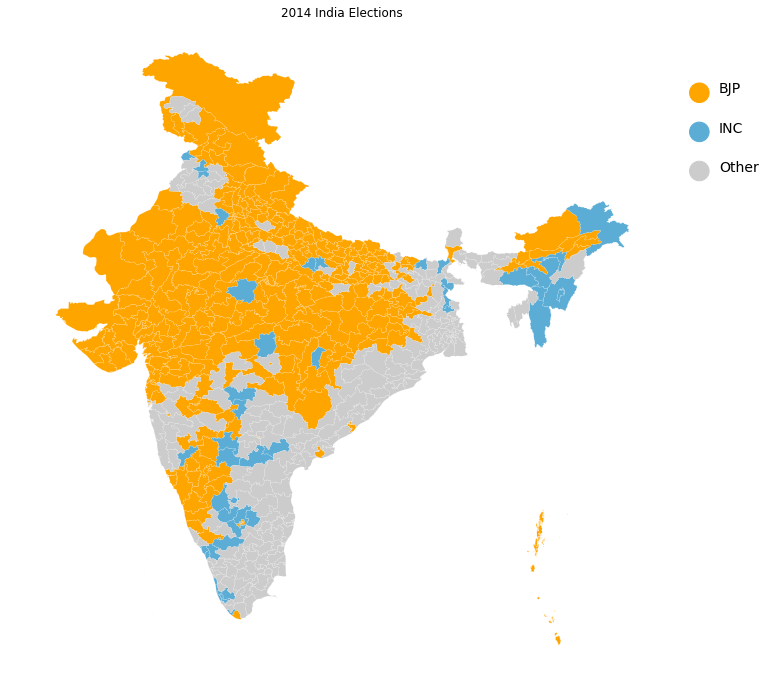

In [100]:
colorpallete = {'BJP': '#FFA500', 'INC': '#5BADD6', 'Other': '#CCCCCC'}
fig, ax = plt.subplots(figsize=(12, 12))
circle1 = plt.Circle((101, 35), 0.5, color='#FFA500', clip_on=False)
circle2 = plt.Circle((101, 33), 0.5, color='#5BADD6', clip_on=False)
circle3 = plt.Circle((101, 31), 0.5, color='#CCCCCC', clip_on=False)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.text(102, 35, 'BJP', fontsize=14)
ax.text(102, 33, 'INC', fontsize=14)
ax.text(102, 31, 'Other', fontsize=14)
for c, data in m2.groupby(['P']):
    color = colorpallete[c]
    data.plot(color=color, ax=ax, label=str(c), legend=True, edgecolor='white', linewidth=0.1)

ax.set_axis_off()
plt.title('2014 India Elections')
plt.show()

Comparing Both the 2014 and 2019 results side by side

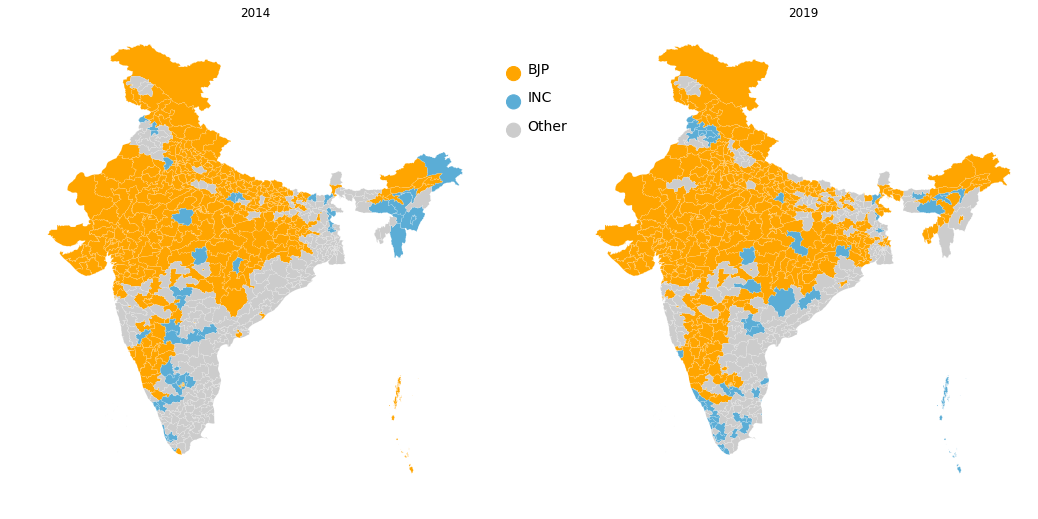

In [102]:
colorpallete = {'BJP': '#FFA500', 'INC': '#5BADD6', 'Other': '#CCCCCC'}
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 14))
circle1 = plt.Circle((101, 35), 0.5, color='#FFA500', clip_on=False)
circle2 = plt.Circle((101, 33), 0.5, color='#5BADD6', clip_on=False)
circle3 = plt.Circle((101, 31), 0.5, color='#CCCCCC', clip_on=False)
ax1.add_artist(circle1)
ax1.add_artist(circle2)
ax1.add_artist(circle3)
ax1.text(102, 35, 'BJP', fontsize=14)
ax1.text(102, 33, 'INC', fontsize=14)
ax1.text(102, 31, 'Other', fontsize=14)
for c, data in m2.groupby(['P']):
    color = colorpallete[c]
    data.plot(color=color, ax=ax1, label=str(c), legend=True, edgecolor='white', linewidth=0.1)

for c, data in m.groupby(['P']):
    color = colorpallete[c]
    data.plot(color=color, ax=ax2, label=str(c), legend=True, edgecolor='white', linewidth=0.1)

ax1.set_title('2014')
ax2.set_title('2019')
ax1.set_axis_off()
ax2.set_axis_off()
plt.show()

From the above comparison we see BJP has been able to maintain its stronghold over states of Rajasthan, Gujrat, Madhya Pradesh, Uttarpradesh, Maharashtra. BJP has gained seats in Karnatak and in the North east. Congress has lost significant seats in the North east, but has gained in Punjab and Kerela

In [52]:
r19.head()

,State,PC No.,PC Name,Category,Winner,Party,Year,P
0,Andaman & Nicobar,1,Andaman & Nicobar Islands,GEN,Kuldeep Rai Sharma,Indian National Congress,2019,INC
1,Andhra Pradesh,1,Araku,(ST),Goddeti Madhavi,YSR Congress Party,2019,Other
2,Andhra Pradesh,2,Srikakulam,GEN,Ram Mohan Naidu Kinjarapu,Telugu Desam Party,2019,Other
3,Andhra Pradesh,3,Vizianagaram,GEN,Bellani Chandrasekhar,YSR Congress Party,2019,Other
4,Andhra Pradesh,4,Visakhapatnam,GEN,MVV Satyanarayana,YSR Congress Party,2019,Other


In [53]:
r14.head()

,State,PC No.,PC Name,Category,Winner,Party,Year,P
0,Andaman & Nicobar,1,Andaman & Nicobar Islands,GEN,Bishnu Pada Ray,BJP,2014,BJP
1,Andhra Pradesh,1,Araku,(ST),Kothapalli Geetha,YSRC,2014,Other
2,Andhra Pradesh,2,Srikakulam,GEN,Rammohan Naidu Kinjarapu,TDP,2014,Other
3,Andhra Pradesh,3,Vizianagaram,GEN,Ashok Gajapathi Raju Pusapati,TDP,2014,Other
4,Andhra Pradesh,4,Visakhapatnam,GEN,Kambhampati Hari Babu,BJP,2014,BJP


Lets compare which seats were gained and lost by both BJP and INC

In [54]:
d19 = r19[['State', 'PC No.', 'P']]
d14 = r14[['State', 'PC No.', 'P']]

In [55]:
d19.columns = ['State', 'PC No.', 'P_2019']
d14.columns = ['State', 'PC No.', 'P_2014']

In [56]:
t = pd.merge(d19, d14, how='left', left_on=['State', 'PC No.'], right_on=['State', 'PC No.'])

In [57]:
t.head()

,State,PC No.,P_2019,P_2014
0,Andaman & Nicobar,1,INC,BJP
1,Andhra Pradesh,1,Other,Other
2,Andhra Pradesh,2,Other,Other
3,Andhra Pradesh,3,Other,Other
4,Andhra Pradesh,4,Other,BJP


In [58]:
def test6(x):
    if x['P_2014'] == 'BJP' and x['P_2019'] == 'BJP':
        x['2019_BJP'] = 'BJP'
        x['2014_BJP'] = 'BJP'
    elif x['P_2014'] == 'BJP' and x['P_2019'] != 'BJP':
        x['2019_BJP'] = 'BJP-'
        x['2014_BJP'] = 'BJP'
    elif x['P_2014'] != 'BJP' and x['P_2019'] == 'BJP':
        x['2019_BJP'] = 'BJP+'
        x['2014_BJP'] = 'I'
    else:
        x['2019_BJP'] = 'I'
        x['2014_BJP'] = 'I'
    return x

In [59]:
t = t.apply(test6, axis=1)

In [60]:
def test7(x):
    if x['P_2014'] == 'INC' and x['P_2019'] == 'INC':
        x['2019_INC'] = 'INC'
        x['2014_INC'] = 'INC'
    elif x['P_2014'] == 'INC' and x['P_2019'] != 'INC':
        x['2019_INC'] = 'INC-'
        x['2014_INC'] = 'INC'
    elif x['P_2014'] != 'INC' and x['P_2019'] == 'INC':
        x['2019_INC'] = 'INC+'
        x['2014_INC'] = 'I'
    else:
        x['2019_INC'] = 'I'
        x['2014_INC'] = 'I'
    return x

In [61]:
t = t.apply(test7, axis=1)

I used the above methods to create 2 new columns which record whihc constituency was gained and which was lost by BJP and INC

In [62]:
t.head()

,State,PC No.,P_2019,P_2014,2019_BJP,2014_BJP,2019_INC,2014_INC
0,Andaman & Nicobar,1,INC,BJP,BJP-,BJP,INC+,I
1,Andhra Pradesh,1,Other,Other,I,I,I,I
2,Andhra Pradesh,2,Other,Other,I,I,I,I
3,Andhra Pradesh,3,Other,Other,I,I,I,I
4,Andhra Pradesh,4,Other,BJP,BJP-,BJP,I,I


Lets see the gain and loss of BJP

In [63]:
m3 = pd.merge(map[['st_name', 'pc_no', 'geometry']], t[['State', 'PC No.', '2014_BJP', '2019_BJP']], how='left',
            left_on=['st_name', 'pc_no'], right_on=['State', 'PC No.'])

In [64]:
m3.groupby(['2014_BJP']).count()

,st_name,pc_no,geometry,State,PC No.,2019_BJP
2014_BJP,,,,,,
BJP,282,282,282,282,282,282
I,261,261,261,261,261,261


In [65]:
m3.groupby(['2019_BJP']).count()

,st_name,pc_no,geometry,State,PC No.,2014_BJP
2019_BJP,,,,,,
BJP,247,247,247,247,247,247
BJP+,55,55,55,55,55,55
BJP-,35,35,35,35,35,35
I,206,206,206,206,206,206


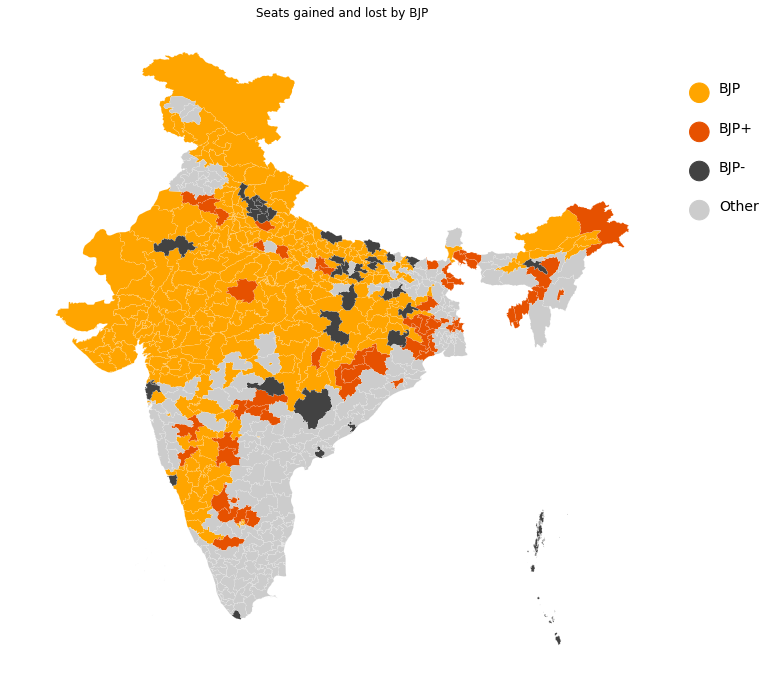

In [103]:
color_2019 = {'BJP': '#FFA500', 'BJP+': '#E65100', 'BJP-': '#424242', 'I': '#CCCCCC'}
fig, ax = plt.subplots(figsize=(12, 12))
circle1 = plt.Circle((101, 35), 0.5, color='#FFA500', clip_on=False)
circle2 = plt.Circle((101, 33), 0.5, color='#E65100', clip_on=False)
circle3 = plt.Circle((101, 31), 0.5, color='#424242', clip_on=False)
circle4 = plt.Circle((101, 29), 0.5, color='#CCCCCC', clip_on=False)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)
ax.text(102, 35, 'BJP', fontsize=14)
ax.text(102, 33, 'BJP+', fontsize=14)
ax.text(102, 31, 'BJP-', fontsize=14)
ax.text(102, 29, 'Other', fontsize=14)
for c, data in m3.groupby(['2019_BJP']):
    color = color_2019[c]
    data.plot(color=color, ax=ax, label=str(c), legend=True, edgecolor='white', linewidth=0.1)

ax.set_axis_off()
plt.title('Seats gained and lost by BJP')
plt.show()

We see that BJP has gained significantly in West Bengal. Also it has gained good number of seats in North Eastern states. There are noticeable gains for BJP in Karnataka and Orrisa.

Lets see what were gains and losses of INC

In [76]:
m4 = pd.merge(map[['st_name', 'pc_no', 'geometry']], t[['State', 'PC No.', '2014_INC', '2019_INC']], how='left',
            left_on=['st_name', 'pc_no'], right_on=['State', 'PC No.'])

In [77]:
m4.groupby(['2019_INC']).count()

,st_name,pc_no,geometry,State,PC No.,2014_INC
2019_INC,,,,,,
I,466,466,466,466,466,466
INC,19,19,19,19,19,19
INC+,33,33,33,33,33,33
INC-,25,25,25,25,25,25


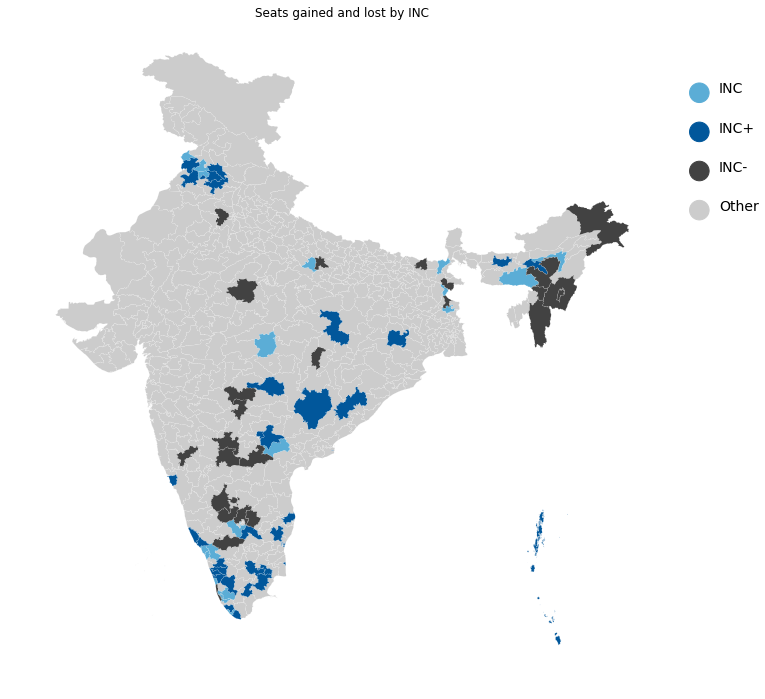

In [104]:
color_2019_c = {'INC': '#5BADD6', 'INC+': '#01579B', 'INC-': '#424242', 'I': '#CCCCCC'}
fig, ax = plt.subplots(figsize=(12, 12))
circle1 = plt.Circle((101, 35), 0.5, color='#5BADD6', clip_on=False)
circle2 = plt.Circle((101, 33), 0.5, color='#01579B', clip_on=False)
circle3 = plt.Circle((101, 31), 0.5, color='#424242', clip_on=False)
circle4 = plt.Circle((101, 29), 0.5, color='#CCCCCC', clip_on=False)
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
ax.add_artist(circle4)
ax.text(102, 35, 'INC', fontsize=14)
ax.text(102, 33, 'INC+', fontsize=14)
ax.text(102, 31, 'INC-', fontsize=14)
ax.text(102, 29, 'Other', fontsize=14)
for c, data in m4.groupby(['2019_INC']):
    color = color_2019_c[c]
    data.plot(color=color, ax=ax, label=str(c), legend=True, edgecolor='white', linewidth=0.1)

ax.set_axis_off()
plt.title('Seats gained and lost by INC')
plt.show()

INC has lost many seats in North East and Karnataka specifically to BJP. INC has significant gains in Kerela and Punjab

to be continued....